# Práctica 2

### Ejercicio 1
El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados 
son los siguientes:  
● Epecies. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH), 
gavilanes colirrojos (RT) y gavilanes rastreros (SS).  

● Año. Indica el año en que se avistó el ave.  

● Hallux. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las 
aves cazadoras para sujetar mejor a sus presas).  

● Ala. Indica la longitud en milímetros de la pluma más larga del ala.

● Peso. Indica el peso del ave en gramos.  

● Cola. Indica la longitud de la cola del ave en milímetros.
  
a) Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay 
correlación/débil/fuerte) y el tipo (positiva/negativa) 

In [9]:
import pandas as pd 

df = pd.read_csv("hawks.csv", delimiter=";", encoding="latin1")

df["Ala"].corr(df["Cola"])


np.float64(0.8998883674343948)

Valor = 0.8998883674343948

Intensidad = Fuerte (mayor que 0.8)

Tipo = positiva

b) Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media 
y desvío.  

In [10]:
media = df["Hallux"].mean()
desvio = df["Hallux"].std()
minimo = df["Hallux"].min()
maximo = df["Hallux"].max()
q1 = df["Hallux"].quantile(0.25)
q2 = df["Hallux"].quantile(0.5)
q3 = df["Hallux"].quantile(0.75)
ric = q3 - q1
big_sup_rango = q3 + 1.5 * ric
big_sup = df["Hallux"][df["Hallux"] < big_sup_rango].max()
big_inf_rango = q1 - 1.5 * ric
big_inf = df["Hallux"][df["Hallux"] > big_inf_rango].min()

print(f"Media: {media}")
print(f"Desviación Típica: {desvio}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"Rango Intercuartílico: {ric}")
print(f"Bigote Superior: {big_sup}")
print(f"Bigote Inferior: {big_inf}")

Media: 291.77155655095186
Desviación Típica: 321.32404993168916
Mínimo: 95
Máximo: 3414
Q1: 152.0
Q2: 295.0
Q3: 315.0
Rango Intercuartílico: 163.0
Bigote Superior: 545
Bigote Inferior: 95


Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones: 

I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos. 
VERDADERO

II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
VERDADERO

III. Un hallux que mida más de 600 mm es considerado atípico extremo. FALSO ya que los atipicos extremos arrancan en 804

In [11]:
at_extremo = q3 + 3 * ric  
print(f"Atípico Extremo: {at_extremo}")

Atípico Extremo: 804.0



IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.



In [12]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler().fit(df[["Hallux"]])

# Transformar un valor nuevo
nuevo_valor = pd.DataFrame([[600]], columns=["Hallux"])
nuevo_valor_norm = scaler.transform(nuevo_valor)
print(nuevo_valor_norm)

[[0.9597824]]


VERDADERO, arriba de 1,59 es extremo

V. En un gavilán es atípico que su hallux mida menos de 100 mm. 

In [13]:
nuevo_valor = pd.DataFrame([[100]], columns=["Hallux"])
nuevo_valor_norm = scaler.transform(nuevo_valor)
print(nuevo_valor_norm)

[[-0.59715114]]


FALSO, es más alto que -1,1

### Ejercicio 2
El archivo globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un niño. En cada registro se anotó si el globo pudo ser inflado o no. 
Numerice los atributos de la siguiente forma:  
● Color = 1 si es rojo y 0 si es amarillo 

● SeEstira? = 1 para Si y 0 para No 

● Edad = 1 si es adulto y 0 si es Nene 

● Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande 


a) Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv 

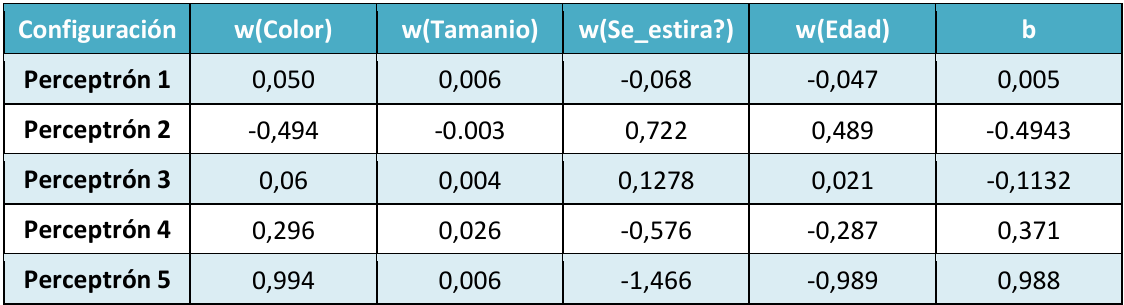

In [ ]:
df = pd.read_csv("globos.csv")

# Numerizo
color = {"Rojo": 1, "Amarillo": 0}
df["Color"] = df["Color"].map(color)

seEstira = {"Si": 1, "No": 0}
df["Se_estira?"] = df["Se_estira?"].map(seEstira)

edad = {"Adulto": 1, "Nene": 0}
df["Edad"] = df["Edad"].map(edad)

tamanio = {"Chico": 0, "Mediano": 0.5, "Grande": 1}
df["Tamanio"] = df["Tamanio"].map(tamanio)

df.head(10)

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0,0.0,1,1,Si
1,0,0.0,1,0,Si
2,0,0.0,0,1,No
3,0,0.0,0,0,No
4,0,1.0,1,1,Si
5,0,1.0,1,0,Si
6,0,0.5,0,1,No
7,0,0.5,0,0,No
8,1,0.0,1,1,Si
9,1,0.0,1,0,No


In [ ]:
import numpy as np
from ClassPerceptron import Perceptron

X = df[["Color", "Tamanio", "Se_estira?", "Edad"]].astype(float).values
Y= df["Inflado?"].map({"Si": 0, "No": 1}).astype(int).values 


perceptrones = [ 
    [0.050, 0.006, -0.068, -0.047, 0.005],
    [-0.494, -0.003, 0.722, 0.489, -0.4943],
    [0.06, 0.004, 0.1278, 0.021, -0.1132],      
    [0.296, 0.026, -0.576, -0.287, 0.371],     
    [0.994, 0.006, -1.466, -0.989, 0.988] 
]  

for i, p_vals in enumerate(perceptrones, start = 1):
    p = Perceptron()
    p.w_ = np.array(p_vals[:4]) # Asigno los pesos
    print(p.w_) 
    p.b_ = p_vals[4] # Asigno bias (desvio estandard)

    y_pred = p.predict(X) # Predicción sobre mis datos
    print(y_pred)
    print(Y)

    if np.array_equal(y_pred, Y):
        print(f"Perceptrón {i} clasifica todos los ejemplos correctamente")
    else:
        errores = np.sum(y_pred != Y)
        print(f"Perceptrón {i} no clasifica todos ({errores} errores)")

[ 0.05   0.006 -0.068 -0.047]
[0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 1 no clasifica todos (4 errores)
[-0.494 -0.003  0.722  0.489]
[1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 2 no clasifica todos (16 errores)
[0.06   0.004  0.1278 0.021 ]
[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 3 no clasifica todos (14 errores)
[ 0.296  0.026 -0.576 -0.287]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 4 clasifica todos los ejemplos correctamente
[ 0.994  0.006 -1.466 -0.989]
[0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 5 no clasifica todos (1 errores)


b) Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el 
que clasifica la menor cantidad de ejemplos correctamente. 

El peor es el perceptrón 2

-Dos pesos son positivos grandes (0.722, 0.489).

-Uno es negativo fuerte (-0.494).

-El bias también es negativo (-0.4943).

Eso significa que el perceptrón pone mucho peso en ciertas variables, y con el bias negativo está desplazando la frontera hacia un lugar donde la mayoría de los ejemplos quedan mal clasificados.

### Ejercicio 3
La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un examen médico en función de su edad, altura y riesgo médico. 
Donde: 
● EDAD es un atributo numérico que indica la edad del paciente. 

● RIESGO es el nivel de riesgo del paciente. 

● EXAMEN indica si debe realizarse un examen extra. 

Para obtener transformar el atributo nominal RIESGO en uno numérico se lo numerizó de la siguiente forma: BAJO = 1, MEDIO = 2 y 
ALTO = 3.

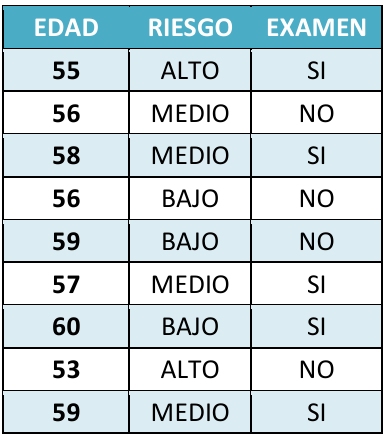

a) Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor? 

Se puede decir que tienen una correlación debil (ya que es menor que 0.8 y mayor que 0.5)

b) Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los 
ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo 
EXAMEN. Los pesos obtenidos fueron los siguientes:  

W(EDAD) = 0.0807         W(RIESGO) = 0.074        Sesgo o bias = -0.0742 

¿Cuál será la respuesta del perceptrón para los siguientes valores?[1] 

(EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO) 

In [ ]:
def normalize_edad(edad, edad_min=18, edad_max=60):
    return (edad - edad_min) / (edad_max - edad_min)

p = Perceptron()
p.w_ = np.array([0.0807, 0.074])   
p.b_ = -0.0742

riesgo_map = {"Bajo": 0, "Medio": 0.5, "Alto": 1}

valores = [(50, "Bajo"), (51, "Medio"), (54, "Alto")]

for edad, riesgo in valores:
    x_edad = normalize_edad(edad)
    x_riesgo = riesgo_map[riesgo]
    X = np.array([[x_edad, x_riesgo]])
    y_pred = p.predict(X)
    print(f"Predicción para EDAD: {edad}, RIESGO: {riesgo} => {y_pred}")

Predicción para EDAD: 50, RIESGO: Bajo => [0]
Predicción para EDAD: 51, RIESGO: Medio => [1]
Predicción para EDAD: 54, RIESGO: Alto => [1]


### Ejercicio 4
Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos previamente. Las variables relevadas son las siguientes: 

● Age: Edad 

● Sex: Sexo 

● BP (Blood Pressure): Presión sanguínea. 

● Cholesterol: nivel de colesterol.

● K: Nivel de potasio en la sangre. 

● Class: Fármaco suministrado. Cada paciente ha sido medicado con un único fármaco de 5 posibles: DrugA, DrugB, DrugC, DrugX, DrugY 

● Na: Nivel de sodio en la sangre. 

a) Utilice el archivo drug_train.csv para entrenar un perceptrón que sea capaz de predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de DrugY) o no.

b) Luego utilice el archivo drug_test.csv para medir la calidad del modelo. 

In [38]:
import sklearn

# Numerizo valores
sex = {"M": 0, "F": 1}
df["Sex"] = df["Sex"].map(sex)
bp = {"HIGH": 1, "NORMAL": 0.5, "LOW": 0}
df["BP"] = df["BP"].map(bp)
cholesterol = {"HIGH": 1, "NORMAL": 0.5, "LOW": 0}
df["Cholesterol"] = df["Cholesterol"].map(cholesterol)
drug = {"drugA": 0, "drugB": 0, "drugC": 0, "drugX": 0, "drugY": 1}
df["Drug"] = df["Drug"].map(drug)
df['Na'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Na'].values.reshape(-1, 1))
df['K'] = sklearn.preprocessing.StandardScaler().fit_transform(df['K'].values.reshape(-1, 1))
df.head(10)


,Age,Sex,BP,Cholesterol,Na,K,Drug
0,16,NaN,NaN,NaN,0.367718,0.642032,NaN
1,42,NaN,NaN,NaN,-1.432057,-1.476815,NaN
2,33,NaN,NaN,NaN,1.357422,-1.460230,NaN
3,47,NaN,NaN,NaN,-0.024780,1.051328,NaN
4,56,NaN,NaN,NaN,0.435842,-1.231922,NaN
5,26,NaN,NaN,NaN,0.701494,0.737658,NaN
6,67,NaN,NaN,NaN,0.730001,-0.081106,NaN
7,42,NaN,NaN,NaN,0.479895,-0.755880,NaN
8,53,NaN,NaN,NaN,-0.699641,-1.384553,NaN
9,65,NaN,NaN,NaN,-0.554247,0.303195,NaN


In [40]:
p = Perceptron(alpha=0.1, n_iter=250)
X = df.drop("Drug", axis=1).values
y = df["Drug"].values
p.fit(X, y)

df = pd.read_csv("drugs_train.csv")


sex = {"M": 0, "F": 1}
df["Sex"] = df["Sex"].map(sex)
bp = {"HIGH": 1, "NORMAL": 0.5, "LOW": 0}
df["BP"] = df["BP"].map(bp)
cholesterol = {"HIGH": 1, "NORMAL": 0.5, "LOW": 0}
df["Cholesterol"] = df["Cholesterol"].map(cholesterol)
drug = {"drugA": 0, "drugB": 0, "drugC": 0, "drugX": 0, "drugY": 1}
df["Drug"] = df["Drug"].map(drug)
df['Na'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Na'].values.reshape(-1, 1))
df['K'] = sklearn.preprocessing.StandardScaler().fit_transform(df['K'].values.reshape(-1, 1))

X = df.drop("Drug", axis=1).values
y = df["Drug"].values

y_pred = p.predict(X)
aciertos = (y == y_pred).sum()
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X.shape[0]))
print(y_pred)
print(y)


Aciertos: 160
% de aciertos = 100.00 %
[0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1]
[0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1]


c) Resuelva el problema: 

● numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único 
y de manera binaria (dummy). 

● Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y 
desvío 